# MoDISco Compare

Compare 2 MoDISco runs (e.g. SVM vs BPNet) across cell states for different.

In [50]:
library(ggplot2)
library(patchwork)
library(ggseqlogo)
library(matrixStats)
library(ggrepel)

In [216]:
MODISCO_PATH1 = "./data/20200518_n76052/bpnet/50k"
MODISCO_PATH2 = "./data/20200518_n76052/svm/50k"
CLUSTER_PATTERN = "cluster*"

In [217]:
dirs1 = list.files(MODISCO_PATH1, 
           pattern=CLUSTER_PATTERN, 
          full.names=T)
dirs2 = list.files(MODISCO_PATH2, 
           pattern=CLUSTER_PATTERN, 
          full.names=T)
dirs1
dirs2

[1] "./data/20200518_n76052/bpnet/50k/cluster_idx1" 
 [2] "./data/20200518_n76052/bpnet/50k/cluster_idx10"
 [3] "./data/20200518_n76052/bpnet/50k/cluster_idx11"
 [4] "./data/20200518_n76052/bpnet/50k/cluster_idx12"
 [5] "./data/20200518_n76052/bpnet/50k/cluster_idx13"
 [6] "./data/20200518_n76052/bpnet/50k/cluster_idx14"
 [7] "./data/20200518_n76052/bpnet/50k/cluster_idx15"
 [8] "./data/20200518_n76052/bpnet/50k/cluster_idx16"
 [9] "./data/20200518_n76052/bpnet/50k/cluster_idx17"
[10] "./data/20200518_n76052/bpnet/50k/cluster_idx18"
[11] "./data/20200518_n76052/bpnet/50k/cluster_idx2" 
[12] "./data/20200518_n76052/bpnet/50k/cluster_idx3" 
[13] "./data/20200518_n76052/bpnet/50k/cluster_idx4" 
[14] "./data/20200518_n76052/bpnet/50k/cluster_idx5" 
[15] "./data/20200518_n76052/bpnet/50k/cluster_idx6" 
[16] "./data/20200518_n76052/bpnet/50k/cluster_idx7" 
[17] "./data/20200518_n76052/bpnet/50k/cluster_idx8" 
[18] "./data/20200518_n76052/bpnet/50k/cluster_idx9"

[1] "./data/20200518_n76052/svm/50k/cluster_idx1" 
 [2] "./data/20200518_n76052/svm/50k/cluster_idx10"
 [3] "./data/20200518_n76052/svm/50k/cluster_idx11"
 [4] "./data/20200518_n76052/svm/50k/cluster_idx12"
 [5] "./data/20200518_n76052/svm/50k/cluster_idx13"
 [6] "./data/20200518_n76052/svm/50k/cluster_idx14"
 [7] "./data/20200518_n76052/svm/50k/cluster_idx15"
 [8] "./data/20200518_n76052/svm/50k/cluster_idx16"
 [9] "./data/20200518_n76052/svm/50k/cluster_idx17"
[10] "./data/20200518_n76052/svm/50k/cluster_idx18"
[11] "./data/20200518_n76052/svm/50k/cluster_idx2" 
[12] "./data/20200518_n76052/svm/50k/cluster_idx3" 
[13] "./data/20200518_n76052/svm/50k/cluster_idx4" 
[14] "./data/20200518_n76052/svm/50k/cluster_idx5" 
[15] "./data/20200518_n76052/svm/50k/cluster_idx6" 
[16] "./data/20200518_n76052/svm/50k/cluster_idx7" 
[17] "./data/20200518_n76052/svm/50k/cluster_idx8" 
[18] "./data/20200518_n76052/svm/50k/cluster_idx9"

### Load TomTom Matches

In [218]:
motif_matches1 = list()
for (i in seq(length(dirs1))) {
    motif_matches1[[i]] = read.table(sprintf("%s/tomtom_matches.hocomoco.tsv", dirs1[i]), 
                                    sep='\t', header=T, row.names=1,
                                   stringsAsFactors = F)
}

names(motif_matches1) = basename(dirs1)

motif_matches2 = list()
for (i in seq(length(dirs2))) {
    motif_matches2[[i]] = read.table(sprintf("%s/tomtom_matches.hocomoco.tsv", dirs2[i]), 
                                    sep='\t', header=T, row.names=1,
                                   stringsAsFactors = F)
}

names(motif_matches2) = basename(dirs2)

In [219]:
head(motif_matches1$cluster_idx1, 3)
head(motif_matches2$cluster_idx1, 3)

,match_1,q.value,match_2,q.value.1,match_3,q.value.2
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
pattern_0,CTCF_HUMAN.H11MO.0.A,1.75193e-09,CTCFL_HUMAN.H11MO.0.A,1.75193e-09,SNAI1_HUMAN.H11MO.0.C,2.40188e-01
pattern_1,PO5F1_HUMAN.H11MO.0.A,1.32142e-10,NANOG_HUMAN.H11MO.0.A,1.40457e-09,PO3F1_HUMAN.H11MO.0.C,9.38863e-05
pattern_2,KLF1_HUMAN.H11MO.0.A,5.21564e-06,KLF4_HUMAN.H11MO.0.A,9.11261e-06,KLF5_HUMAN.H11MO.0.A,4.71149e-05


,match_1,q.value,match_2,q.value.1,match_3,q.value.2
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
pattern_0,KLF3_HUMAN.H11MO.0.B,1.02452e-05,KLF6_HUMAN.H11MO.0.A,2.50968e-05,KLF1_HUMAN.H11MO.0.A,2.50968e-05
pattern_1,PO5F1_HUMAN.H11MO.0.A,2.57581e-08,NANOG_HUMAN.H11MO.0.A,1.13226e-07,PO3F1_HUMAN.H11MO.0.C,2.09710e-04
pattern_2,CTCF_HUMAN.H11MO.0.A,6.73650e-12,CTCFL_HUMAN.H11MO.0.A,1.61644e-06,ZIC3_HUMAN.H11MO.0.B,1.07165e-01


### Load Annotation
This is specific to HOCOMOCO.

In [220]:
motif_annotation = read.table("../../../resources/hocomoco/HOCOMOCOv11_core_annotation_HUMAN_mono.tsv", 
                              sep='\t', header=T, row.names=1,
                              stringsAsFactors = F)

In [221]:
dim(motif_annotation)
head(motif_annotation, 2)

[1] 401  18

,Transcription.factor,Model.length,Quality,Model.rank,Consensus,Model.release,Data.source,Best.auROC..human.,Best.auROC..mouse.,Peak.sets.in.benchmark..human.,Peak.sets.in.benchmark..mouse.,Aligned.words,TF.family,TF.subfamily,HGNC,EntrezGene,UniProt.ID,UniProt.AC
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
AHR_HUMAN.H11MO.0.B,AHR,9,B,0,dKhGCGTGh,HOCOMOCOv9,Integrative,NA,NA,NA,NA,157,PAS domain factors{1.2.5},Ahr-like factors{1.2.5.1},348,196,AHR_HUMAN,P35869
AIRE_HUMAN.H11MO.0.C,AIRE,18,C,0,hnnGGWWnddWWGGdbWh,HOCOMOCOv9,Integrative,NA,NA,NA,NA,41,AIRE{5.3.1},AIRE{5.3.1.0.1},360,326,AIRE_HUMAN,O43918


In [222]:
all(motif_matches1[[1]]$match_1 %in% rownames(motif_annotation))
all(motif_matches2[[1]]$match_1 %in% rownames(motif_annotation))

[1] TRUE

[1] TRUE

## Compare

In [223]:
all_motif_matches1 = do.call(rbind, 
                             lapply(motif_matches1, function(x) {x[!duplicated(x$match_1),]})) # keep only one match to TF per sample
all_motif_matches2 = do.call(rbind, 
                             lapply(motif_matches2, function(x) {x[!duplicated(x$match_1),]}))

In [224]:
dim(all_motif_matches1)
dim(all_motif_matches2)

[1] 355   6

[1] 415   6

In [225]:
QVAL_CUTOFF = 0.01

top_sig_matches1 = all_motif_matches1$match_1[all_motif_matches1$q.value<QVAL_CUTOFF]
top_sig_matches2 = all_motif_matches2$match_1[all_motif_matches2$q.value<QVAL_CUTOFF]

length(unique(top_sig_matches1))
length(unique(top_sig_matches2))

[1] 61

[1] 77

In [226]:
all_motifs = unique(union(top_sig_matches1, top_sig_matches2))
raw_counts_df = data.frame(freq1=as.vector(table(top_sig_matches1)[all_motifs]),
                          freq2=as.vector(table(top_sig_matches2)[all_motifs]))
rownames(raw_counts_df) = lapply(strsplit(all_motifs, "_"), "[[", 1)
raw_counts_df$motif = rownames(raw_counts_df)
raw_counts_df[is.na(raw_counts_df)] = 0


raw_counts_df$colour = ifelse((raw_counts_df$freq1==0)|(raw_counts_df$freq2==0), "exclusive", "shared")

head(raw_counts_df)

,freq1,freq2,motif,colour
,<dbl>,<dbl>,<chr>,<chr>
CTCF,14,18,CTCF,shared
PO5F1,11,8,PO5F1,shared
KLF1,3,0,KLF1,exclusive
NANOG,7,11,NANOG,shared
JUN,8,3,JUN,shared
NFYB,18,18,NFYB,shared


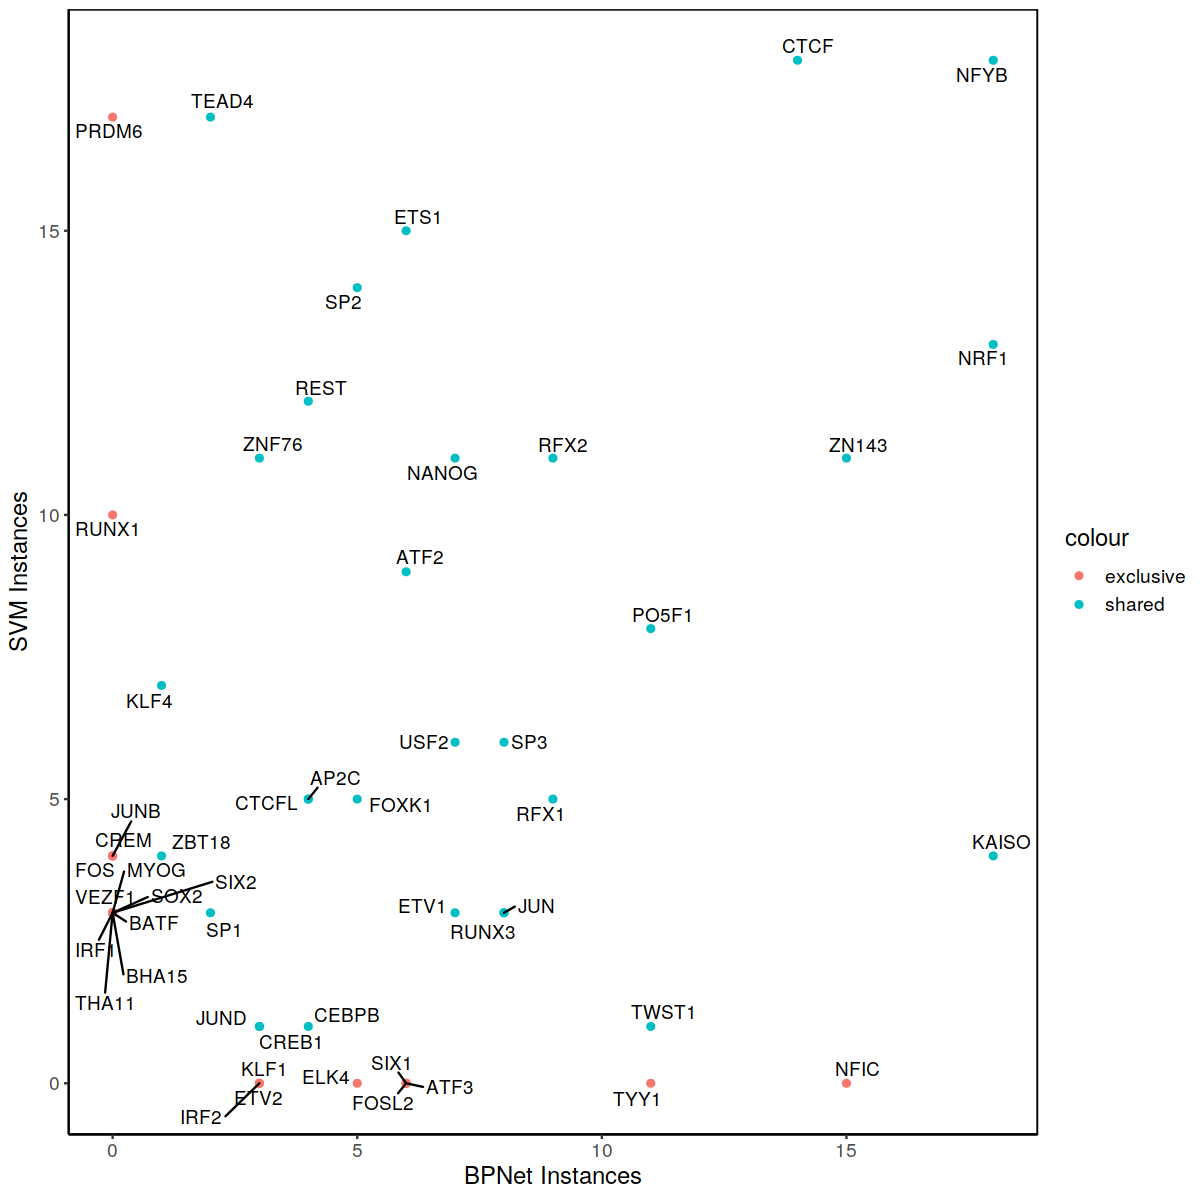

In [227]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(raw_counts_df[!((raw_counts_df$freq1<3)&
                         (raw_counts_df$freq2<3)),],
       aes(x=freq1,y=freq2)) +
geom_point(aes(color=colour))  +
geom_text_repel(aes(label=motif)) +
# xlim(0,5) + ylim(0,5) +
theme_classic() +
xlab("BPNet Instances") + ylab("SVM Instances") +
theme(plot.title = element_text(hjust = 0.5),
      text = element_text(size=14),
#       axis.line=element_blank(),
      panel.border = element_rect(colour = "black", fill=NA, size=0.5)) 

### Motif Families

In [228]:
QVAL_CUTOFF = 0.01

families1 = motif_annotation[all_motif_matches1$match_1[all_motif_matches1$q.value<QVAL_CUTOFF], "TF.family"]
# some rare TFs like PEBB don't have families :(
families1[families1==''] = all_motif_matches1$match_1[all_motif_matches1$q.value<QVAL_CUTOFF][families1=='']

families2 = motif_annotation[all_motif_matches2$match_1[all_motif_matches2$q.value<QVAL_CUTOFF], "TF.family"]
families2[families2==''] = all_motif_matches2$match_1[all_motif_matches2$q.value<QVAL_CUTOFF][families2=='']

length(unique(families1))
length(unique(families2))

[1] 30

[1] 30

In [229]:
all_families = unique(union(families1, families2))
families_counts_df = data.frame(freq1=as.vector(table(families1)[all_families]),
                          freq2=as.vector(table(families2)[all_families]))
rownames(families_counts_df) = lapply(strsplit(all_families, "\\{"), "[[", 1)
families_counts_df$motif_family = lapply(strsplit(rownames(families_counts_df), "\\{"), "[[", 1)
families_counts_df[is.na(families_counts_df)] = 0


families_counts_df$colour = ifelse(xor(families_counts_df$freq1<2,families_counts_df$freq2<2), "exclusive", "shared")

head(families_counts_df)

,freq1,freq2,motif_family,colour
,<dbl>,<dbl>,<list>,<chr>
More than 3 adjacent zinc finger factors,50,69,More than 3 adjacent zinc finger factors,shared
POU domain factors,12,10,POU domain factors,shared
Three-zinc finger Krüppel-related factors,21,36,Three-zinc finger Krüppel-related factors,shared
NK-related factors,7,11,NK-related factors,shared
Jun-related factors,17,20,Jun-related factors,shared
Heteromeric CCAAT-binding factors,18,18,Heteromeric CCAAT-binding factors,shared


Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Removed 4 rows containing missing values (geom_text_repel).”


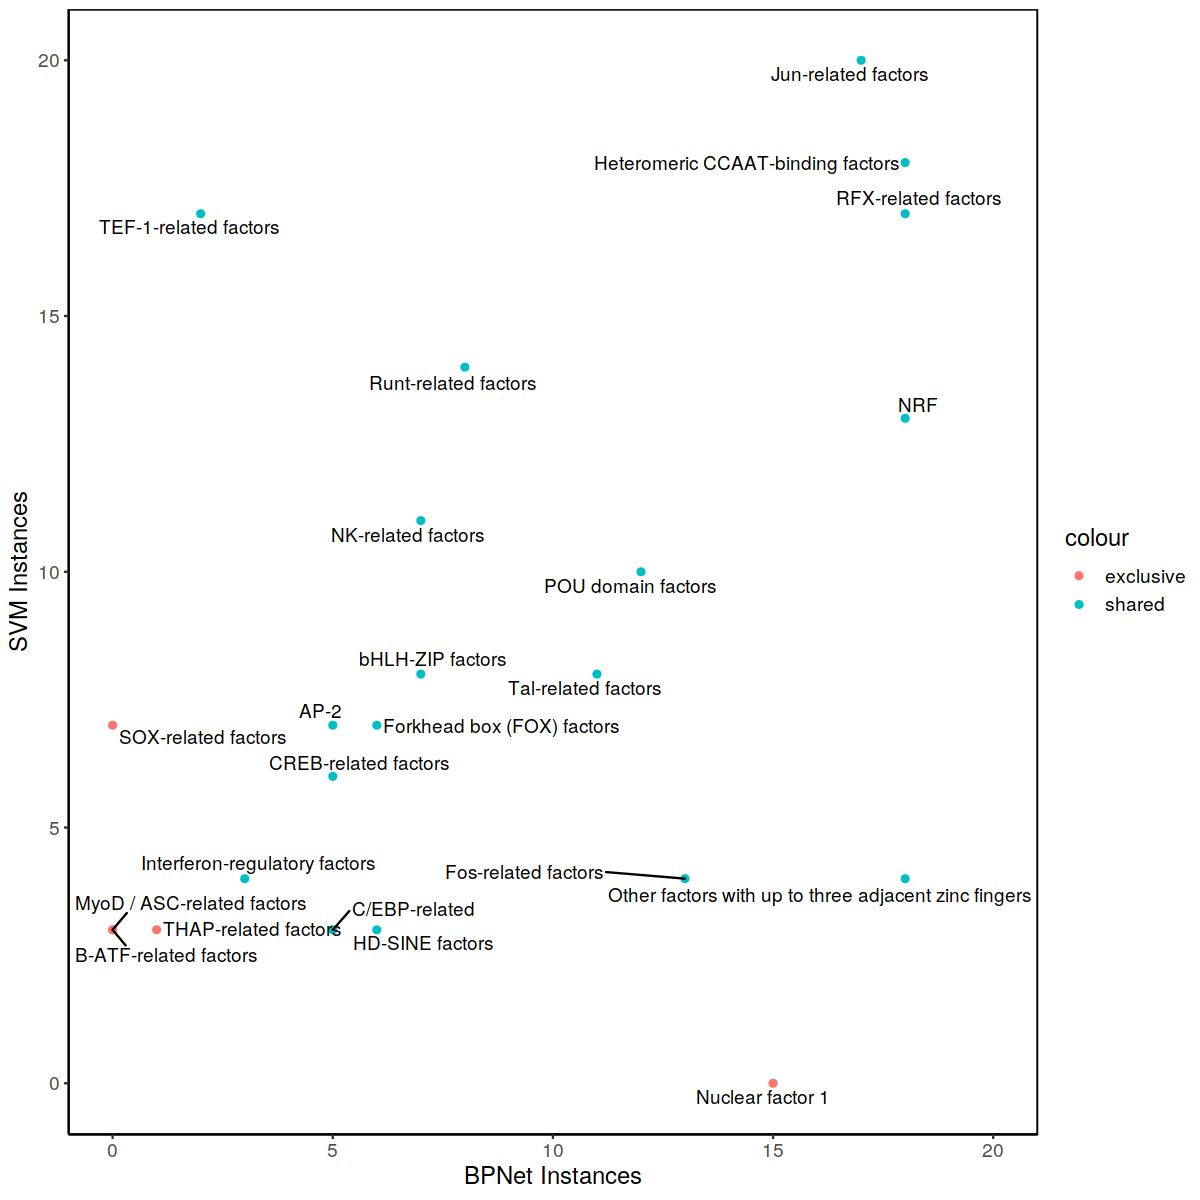

In [230]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(families_counts_df[!((families_counts_df$freq1<3)&
                              (families_counts_df$freq2<3)),], 
       aes(x=freq1,y=freq2)) +
geom_point(aes(color=colour))  +
geom_text_repel(aes(label=motif_family)) +
xlim(0,20) + ylim(0,20) +
theme_classic() +
xlab("BPNet Instances") + ylab("SVM Instances") +
theme(plot.title = element_text(hjust = 0.5),
      text = element_text(size=14),
#       axis.line=element_blank(),
      panel.border = element_rect(colour = "black", fill=NA, size=0.5)) 